In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt



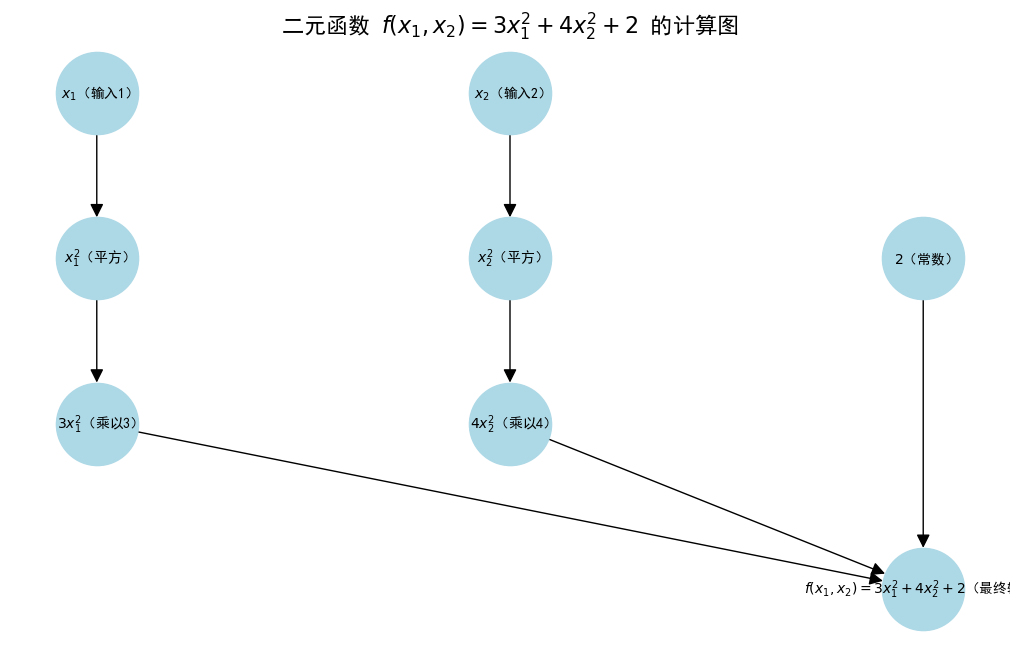

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

# 设置 Matplotlib 中文字体支持
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 创建有向图
G = nx.DiGraph()

# 添加节点
# 输入层
G.add_node("$x_1$（输入1）", pos=(0, 3))
G.add_node("$x_2$（输入2）", pos=(1, 3))

# 中间层 - 第一步计算 x1平方和 x2平方
G.add_node("$x_1^2$（平方）", pos=(0, 2))
G.add_node("$x_2^2$（平方）", pos=(1, 2))

# 线性组合系数乘法
G.add_node("$3x_1^2$（乘以3）", pos=(0, 1))
G.add_node("$4x_2^2$（乘以4）", pos=(1, 1))

# 常数项
G.add_node("$2$（常数）", pos=(2, 2))

# 输出层 - 最终输出
G.add_node("$f(x_1, x_2) = 3x_1^2 + 4x_2^2 + 2$（最终输出）", pos=(2, 0))

# 添加边
# 输入层到中间层
G.add_edge("$x_1$（输入1）", "$x_1^2$（平方）")
G.add_edge("$x_2$（输入2）", "$x_2^2$（平方）")

# 中间层到线性组合系数乘法
G.add_edge("$x_1^2$（平方）", "$3x_1^2$（乘以3）")
G.add_edge("$x_2^2$（平方）", "$4x_2^2$（乘以4）")

# 线性组合系数乘法到最终输出
G.add_edge("$3x_1^2$（乘以3）", "$f(x_1, x_2) = 3x_1^2 + 4x_2^2 + 2$（最终输出）")
G.add_edge("$4x_2^2$（乘以4）", "$f(x_1, x_2) = 3x_1^2 + 4x_2^2 + 2$（最终输出）")
G.add_edge("$2$（常数）", "$f(x_1, x_2) = 3x_1^2 + 4x_2^2 + 2$（最终输出）")

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制计算图
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, with_labels=True, node_size=3500, 
    node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20,
    edge_color="black"
)

# 设置标题
plt.title("二元函数 $f(x_1, x_2) = 3x_1^2 + 4x_2^2 + 2$ 的计算图", fontsize=16)
plt.show()

In [3]:
# 初始化参数
x1 = torch.tensor(5.0, requires_grad=True)
x2 = torch.tensor(5.0, requires_grad=True)
alpha = 0.1  # 学习率
epsilon = 0.0001  # 收敛阈值
iterations = 100  # 迭代次数

# 记录迭代过程
x1_values = []
x2_values = []
f_values = []

# 定义函数
def f(x1, x2):
    return 3 * x1**2 + 4 * x2**2 + 2

# 梯度下降循环
for iteration in range(iterations):
    # 计算函数值
    value = f(x1, x2)
    f_values.append(value.item())
    
    # 检查是否收敛
    if value.grad is not None and np.sqrt(value.grad.norm().item()) < epsilon:
        print(f"Converged after {iteration} iterations.")
        break
    
    # 计算梯度
    value.backward()
    
    # 更新参数
    with torch.no_grad():
        x1 -= alpha * x1.grad
        x2 -= alpha * x2.grad
    
    # 记录x1和x2的值
    x1_values.append(x1.item())
    x2_values.append(x2.item())
    
    # 重置梯度
    x1.grad.zero_()
    x2.grad.zero_()

# 输出最终结果
print(f"Final x1 value: {x1.item()}")
print(f"Final x2 value: {x2.item()}")
print(f"Function value at minimum: {f(x1, x2).item()}")


Final x1 value: 8.034667043853133e-40
Final x2 value: 0.0
Function value at minimum: 2.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30028\21592792.py:24: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  if value.grad is not None and np.sqrt(value.grad.norm().item()) < epsilon:


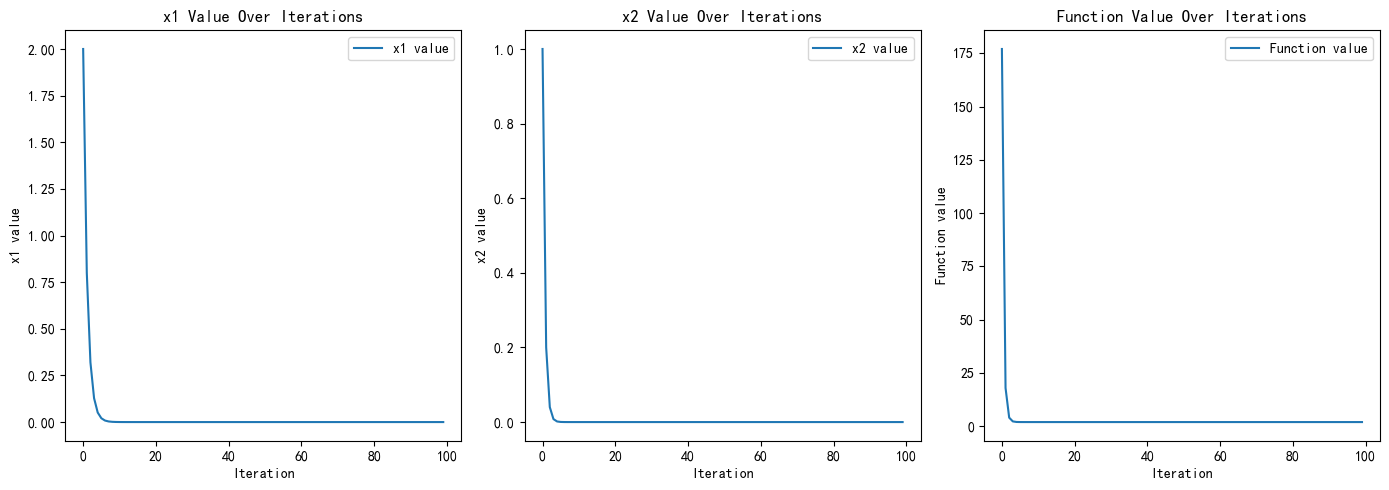

In [4]:

# 绘制迭代过程的图像
plt.figure(figsize=(14, 5))

# 绘制x1值的变化
plt.subplot(1, 3, 1)
plt.plot(x1_values, label='x1 value')
plt.xlabel('Iteration')
plt.ylabel('x1 value')
plt.title('x1 Value Over Iterations')
plt.legend()

# 绘制x2值的变化
plt.subplot(1, 3, 2)
plt.plot(x2_values, label='x2 value')
plt.xlabel('Iteration')
plt.ylabel('x2 value')
plt.title('x2 Value Over Iterations')
plt.legend()

# 绘制函数值的变化
plt.subplot(1, 3, 3)
plt.plot(f_values, label='Function value')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('Function Value Over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

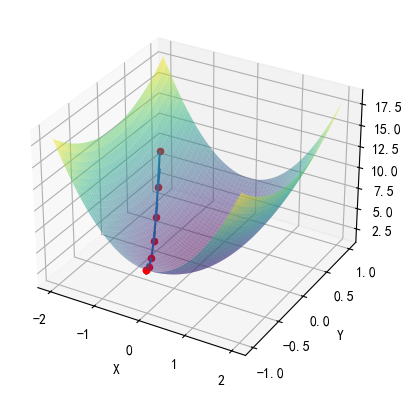

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# 准备梯度下降的初始点和记录点
x1_values = [-1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0]
x2_values = [0.5, 0.25, 0.0, -0.25, -0.5, -0.75, -1.0]
f_values = [f(x, y) for x, y in zip(x1_values, x2_values)]

# 绘制3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# 绘制梯度下降路径
for i in range(1, len(x1_values)):
    x1, y1 = x1_values[i-1], x2_values[i-1]
    x2, y2 = x1_values[i], x2_values[i]
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    # 计算箭头的方向向量
    u = x2 - x1
    v = y2 - y1
    w = z2 - z1
    # 绘制箭头
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

# 绘制红色位置点
for x1, x2, z in zip(x1_values, x2_values, f_values):
    ax.scatter(x1, x2, z, color='r')  # 红色点表示位置

# 绘制最终点
ax.scatter(x1_values[-1], x2_values[-1], f_values[-1], color='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()